<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [111]:
print('Hello')

Hello


In [112]:
%pip install seaborn

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [114]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [115]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [116]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [117]:
df = pd.read_csv(file_name)

In [118]:
num_rows = len(df)
print('Number of rows: ',num_rows) 

Number of rows:  11398


> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


#### Check if any rows contain null values

In [119]:
null_vals = df['ConvertedComp'].isnull().sum()
print('Null values in ConvertedComp: ',null_vals)

Null values in ConvertedComp:  816


#### Remove null values from ConvertedComp column

In [120]:
#df.dropna(inplace=True)
df.dropna(subset=['ConvertedComp'], inplace=True)

In [121]:
drop_convComp_null_vals = df['ConvertedComp'].isnull().sum()
print('Null values in ConvertedComp: ',drop_convComp_null_vals)

Null values in ConvertedComp:  0


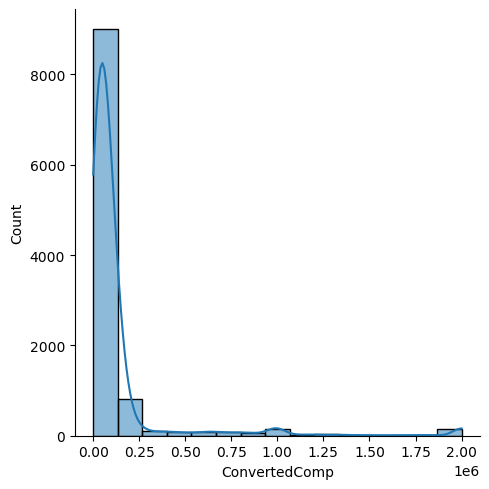

In [122]:
import seaborn as sns
sns.displot(df['ConvertedComp'], kde=True, bins=15)

Plot the histogram for the column `ConvertedComp`.


Text(0.5, 0, 'ConvertedComp')

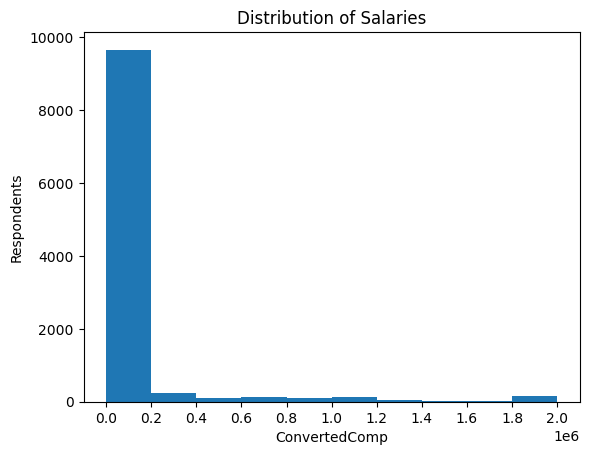

In [123]:
count, bin_edges = np.histogram(df['ConvertedComp'])
df['ConvertedComp'].plot(kind='hist', xticks = bin_edges)
plt.title('Distribution of Salaries')
plt.ylabel('Respondents')
plt.xlabel('ConvertedComp')


What is the median of the column `ConvertedComp`?


In [124]:
median = df['ConvertedComp'].median()
print('Median: ', median)

Median:  57745.0


How many responders identified themselves only as a **Man**?


In [ ]:
# your code goes here


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [ ]:
# your code goes here


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


#### Remove NaNs from 'Age' column

In [125]:
df.dropna(subset=['Age'], inplace=True)

In [126]:
drop_age_null_vals = df['Age'].isnull().sum()
print('Null values in Age: ',drop_age_null_vals)

Null values in Age:  0


In [127]:
df['Age'].describe().apply(lambda x: format(x, 'f'))


count    10354.000000
mean        30.833040
std          7.389983
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: object

Plot a histogram of the column `Age`.


Text(0.5, 0, 'Age')

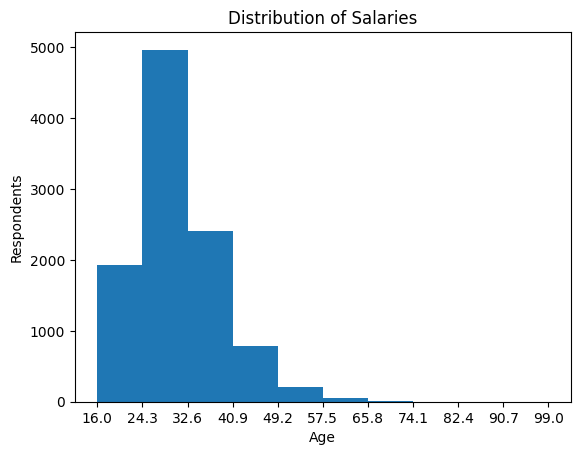

In [128]:
count, bin_edges = np.histogram(df['Age'])
df['Age'].plot(kind='hist', xticks = bin_edges)
plt.title('Distribution of Salaries')
plt.ylabel('Respondents')
plt.xlabel('Age')

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


#### Median before removing outliers

In [129]:
median = df['ConvertedComp'].median()
print('Median: ', median)

Median:  57600.0


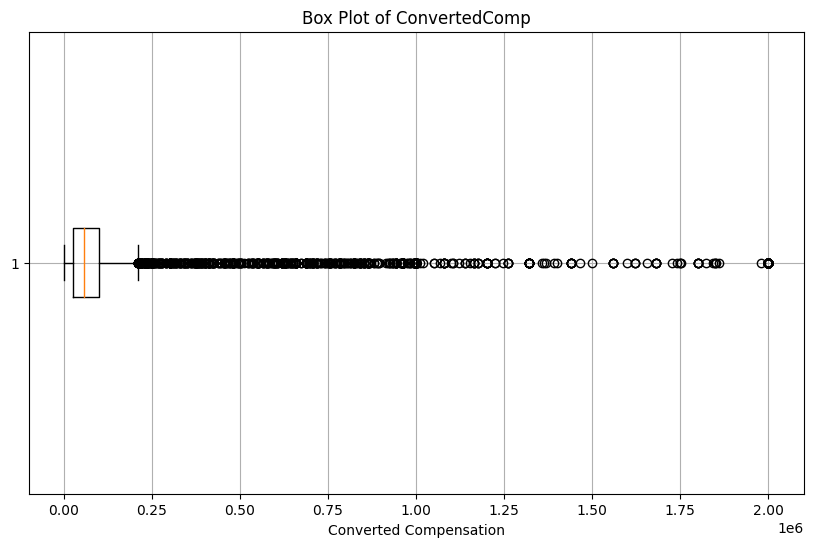

In [130]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedComp'].dropna(), vert=False)
plt.title('Box Plot of ConvertedComp')
plt.xlabel('Converted Compensation')
plt.grid(True)
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [131]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3 - Q1
print('Inter Quartile Range: ',IQR)

Inter Quartile Range:  73165.5


Find out the upper and lower bounds.


In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('Lower Bound: ',lower_bound)
print('Upper Bound: ',upper_bound)

Identify how many outliers are there in the `ConvertedComp` column.


In [132]:
outliers = (df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)
num_outliers = outliers.sum()
print(f'Number of outliers in ConvertedComp: {num_outliers}')

Number of outliers in ConvertedComp: 861


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [133]:
df_filtered = df[~((df['ConvertedComp'] < (Q1 - 1.5 * IQR)) | (df['ConvertedComp'] > (Q3 + 1.5 * IQR)))]

#### Median after removing outliers

In [134]:
median = df_filtered['ConvertedComp'].median()
print('Median: ', median)

Median:  52356.0


#### Mean after removing outliers

In [135]:
mean_val = df_filtered['ConvertedComp'].mean()
print('Mean: ', mean_val)

Mean:  59740.17044137786


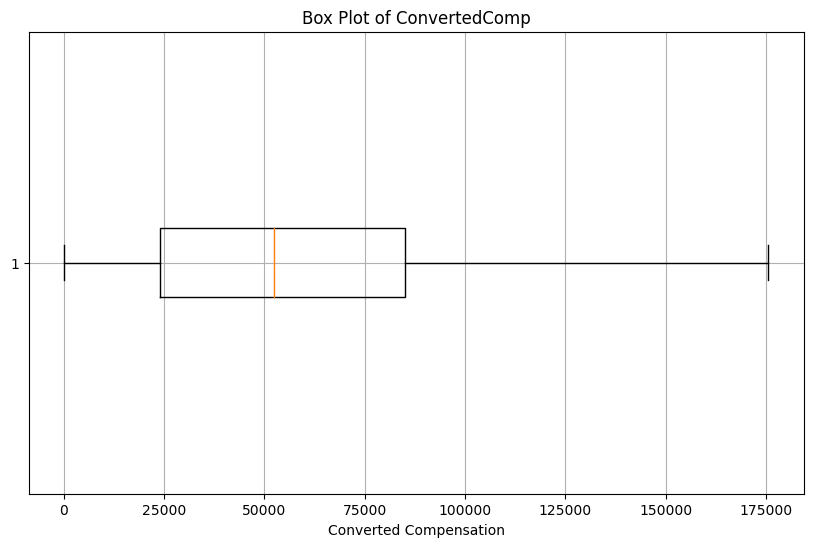

In [136]:
#Box Plot of ConvertedComp (Outliers Removed)
plt.figure(figsize=(10, 6))
plt.boxplot(df_filtered['ConvertedComp'].dropna(), vert=False, showfliers=False)
plt.title('Box Plot of ConvertedComp')
plt.xlabel('Converted Compensation')
plt.grid(True)
plt.show()

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


#### Check NaN values in ConvertedComp and Age columns

In [137]:
drop_age_null_vals = df['Age'].isnull().sum()
print('Null values in Age: ',drop_age_null_vals)

Null values in Age:  0


In [138]:
drop_convComp_null_vals = df['ConvertedComp'].isnull().sum()
print('Null values in ConvertedComp: ',drop_convComp_null_vals)

Null values in ConvertedComp:  0


#### Check data types for each column

In [141]:
print(df['Age'].dtypes)

float64


In [148]:
print(df['ConvertedComp'].dtypes)

float64


#### Are there any non-numeric data entries in these data columns?

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df['Respondent']

In [181]:
print(df.dtypes)

Respondent                  int64
MainBranch                 object
Hobbyist                   object
OpenSourcer                object
OpenSource                 object
Employment                 object
Country                    object
Student                    object
EdLevel                    object
UndergradMajor             object
EduOther                   object
OrgSize                    object
DevType                    object
YearsCode                  object
Age1stCode                 object
YearsCodePro               object
CareerSat                  object
JobSat                     object
MgrIdiot                   object
MgrMoney                   object
MgrWant                    object
JobSeek                    object
LastHireDate               object
LastInt                    object
FizzBuzz                   object
JobFactors                 object
ResumeUpdate               object
CurrencySymbol             object
CurrencyDesc               object
CompTotal     

In [191]:
corr_def = df.select_dtypes(include=['int64', 'float64']).corr()
corr_def['Age']

Respondent       0.002394
CompTotal        0.006949
ConvertedComp    0.105386
WorkWeekHrs      0.031592
CodeRevHrs      -0.015742
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
